# SI 330 - Homework 3: AWS, RDS, MySQL, and Visualization
## Top-level goal:
To explore the goodreads database that we created during the past few classes.

**NOTE**: You will need to review your notebooks from the past few classes to complete this assignment.

Take a look at the first few entries in the ```books``` table.  Specifically, take a look at the ```authors``` field.  

You'll notice that some entries contain multiple authors such as:
>  'Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-Doubleday'

(that's from iloc[14])

Note too that some non-ASCII characters in the author names are misformed.  That's my fault and can be ignored for the purposes of this assignment.

Your task is to "break out" those authors into a separate dataframe, then use either merge, join, or any other functionality from pandas to answer the following questions.  Please note that there are multiple ways to figure out the answers.  You can, of course, choose to do things in a "pythonic" way rather than a "pandorable" way, but it will be more difficult to get full points if you do so.

You will also need to use some of the visualization techniques we learned when we covered matplotlib a few weeks ago.

In [1]:
import pymysql

In [19]:
connection = pymysql.connect(host='', # remove this before submitting
                             user='', # remove this before submitting
                             password='', # remove this before submitting
                             db='goodreads',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [3]:
import pandas as pd

In [4]:
df = pd.read_sql('SELECT * FROM books',con=connection)

### Q1: How many unique authors are there?

In [5]:
author = df['authors'].str.split(', ', expand = True).stack()
author_count = author.nunique()
author_count

5707

### Q2: Create a barchart that has the number of authors from 1 to n across the horizontal axis and the number of books having that number of authors as the vertical axis.

In [6]:
import matplotlib.pyplot as plt

In [7]:
author = df['authors'].str.split(', ', expand = False)
author_df = author.to_frame()
author_df['count'] = author_df['authors'].apply(len)

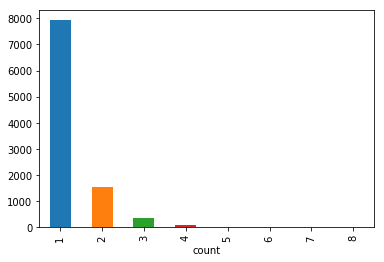

In [87]:
author_number = author_df.groupby('count').size()
author_number.plot(kind='bar')

### Q3: How many books as J.K. Rowling co-authored with someone else?

In [8]:
dataframe1 = pd.read_sql('SELECT * FROM books WHERE authors LIKE "%J.K. Rowling%"',con=connection)
dataframe2 = dataframe1[dataframe1['authors'].apply(len)>12]
dataframe2.shape

(19, 23)

J.K. Rowling co-authored 19 books

### Q4: Who has co-authored books with J.K Rowling?

In [9]:
list_author = dataframe1.authors.str.split(', ', expand = True).stack().unique()
new_list = list()
for x in list_author:
    if(x!='J.K. Rowling'):
        new_list.append(x)
new_list

['Mary GrandPrÃ©',
 'Rufus Beck',
 'Robert Galbraith',
 'John Tiffany',
 'Jack Thorne',
 'Newt Scamander',
 'Albus Dumbledore',
 'Kennilworthy Whisp',
 'MinaLima',
 'Joel Holland',
 'Melissa Anelli']

### Q5: Which book has the largest number of authors?  How many authors?  Who are the authors?

In [12]:
book = df.authors.str.split(', ', expand=True).dropna()
most_authors = book[book[7].apply(len)>1].index
# book.head()

8 authors is the max amount of authors writing a book

In [11]:
df1 = df.loc[most_authors]
df1[['authors', 'original_title']]

,authors,original_title
2936,"Neil Gaiman, Shawn McManus, Colleen Doran, Bry...",The Sandman: A Game of You
3394,"Neil Gaiman, Marc Hempel, Richard Case, D'Isra...",The Sandman: The Kindly Ones
4154,"Jon Stewart, Rory Albanese, Kevin Bleyer, Rich...",Earth: A Visitor's Guide to the Human Race
4938,"Franz Kafka, Nahum N. Glatzer, John Updike, Wi...",SÃ¤mtliche ErzÃ¤hlungen


### Q6: Which author's books have been tagged with the largest number of unique tags?

In [20]:
df_tags = pd.read_sql("""SELECT books.title, books.authors, tags.tag_name FROM books
                        LEFT JOIN books_tags on books_tags.goodreads_book_id = books.goodreads_book_id
                        LEFT JOIN tags on tags.tag_id = books_tags.tag_id""", con=connection)

In [15]:
author = {}
for i, row in df_tags.iterrows():
    if row.title not in author:
        author[row.title] = [row.tag_name]
    else:
        author[row.title].append(row.tag_name)

max_item=0
max_name=''

for x in author:
    if len(author[x])>max_item:
        max_item = len(author[x])
        max_name = x
print(max_item)
print(max_name)

400
Selected Poems


In [17]:
df_tags.loc[df_tags['title'] == max_name].head(1)

,title,authors,tag_name
645362,Selected Poems,Emily Dickinson,to-read\r
